# Importing necessary libraries

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras import optimizers,losses
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Importing DataSets 
* Source : http://peipa.essex.ac.uk/pix/mias/


In [2]:
!wget http://peipa.essex.ac.uk/pix/mias/all-mias.tar.gz

--2021-04-01 06:02:00--  http://peipa.essex.ac.uk/pix/mias/all-mias.tar.gz
Resolving peipa.essex.ac.uk (peipa.essex.ac.uk)... 155.245.93.3
Connecting to peipa.essex.ac.uk (peipa.essex.ac.uk)|155.245.93.3|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111154265 (106M) [application/gzip]
Saving to: ‘all-mias.tar.gz’

all-mias.tar.gz     100%[===================>] 106.00M  11.3MB/s    in 9.4s    

2021-04-01 06:02:10 (11.3 MB/s) - ‘all-mias.tar.gz’ saved [111154265/111154265]



In [3]:
import os
os.listdir()

['.config', 'all-mias.tar.gz', 'sample_data']

In [4]:
!tar -xvf /content/all-mias.tar.gz

Info.txt
Licence.txt
README
mdb001.pgm
mdb002.pgm
mdb003.pgm
mdb004.pgm
mdb005.pgm
mdb006.pgm
mdb007.pgm
mdb008.pgm
mdb009.pgm
mdb010.pgm
mdb011.pgm
mdb012.pgm
mdb013.pgm
mdb014.pgm
mdb015.pgm
mdb016.pgm
mdb017.pgm
mdb018.pgm
mdb019.pgm
mdb020.pgm
mdb021.pgm
mdb022.pgm
mdb023.pgm
mdb024.pgm
mdb025.pgm
mdb026.pgm
mdb027.pgm
mdb028.pgm
mdb029.pgm
mdb030.pgm
mdb031.pgm
mdb032.pgm
mdb033.pgm
mdb034.pgm
mdb035.pgm
mdb036.pgm
mdb037.pgm
mdb038.pgm
mdb039.pgm
mdb040.pgm
mdb041.pgm
mdb042.pgm
mdb043.pgm
mdb044.pgm
mdb045.pgm
mdb046.pgm
mdb047.pgm
mdb048.pgm
mdb049.pgm
mdb050.pgm
mdb051.pgm
mdb052.pgm
mdb053.pgm
mdb054.pgm
mdb055.pgm
mdb056.pgm
mdb057.pgm
mdb058.pgm
mdb059.pgm
mdb060.pgm
mdb061.pgm
mdb062.pgm
mdb063.pgm
mdb064.pgm
mdb065.pgm
mdb066.pgm
mdb067.pgm
mdb068.pgm
mdb069.pgm
mdb070.pgm
mdb071.pgm
mdb072.pgm
mdb073.pgm
mdb074.pgm
mdb075.pgm
mdb076.pgm
mdb077.pgm
mdb078.pgm
mdb079.pgm
mdb080.pgm
mdb081.pgm
mdb082.pgm
mdb083.pgm
mdb084.pgm
mdb085.pgm
mdb086.pgm
mdb087.pgm
mdb088.pgm
mdb0

# Information about data


* REFNUM : MIAS database reference number.

* BG : Character of background tissue: 
                F - Fatty 
                G - Fatty-glandular
                D - Dense-glandular

* CLASS : Class of abnormality present:
                CALC - Calcification
                CIRC - Well-defined/circumscribed masses
                SPIC - Spiculated masses
                MISC - Other, ill-defined masses
                ARCH - Architectural distortion
                ASYM - Asymmetry
                NORM - Normal

* SEVERITY : Severity of abnormality;
                B - Benign
                M - Malignant
                
* X, Y : x,y image-coordinates of centre of abnormality.

* RADIUS : Approximate radius (in pixels) of a circle enclosing the abnormality.

In [7]:
import pandas as pd
os.listdir()
info = pd.read_csv('/content/Info.txt',sep=' ')

In [8]:
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS,Unnamed: 7
0,mdb001,G,CIRC,B,535.0,425.0,197.0,NaN
1,mdb002,G,CIRC,B,522.0,280.0,69.0,NaN
2,mdb003,D,NORM,NaN,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477.0,133.0,30.0,NaN
...,...,...,...,...,...,...,...,...
325,mdb318,D,NORM,NaN,NaN,NaN,NaN,NaN
326,mdb319,D,NORM,NaN,NaN,NaN,NaN,NaN
327,mdb320,D,NORM,NaN,NaN,NaN,NaN,NaN
328,mdb321,D,NORM,NaN,NaN,NaN,NaN,NaN


# Pre-process Data

In [9]:
# Removing Un-necessary column: "Unnamed: 7"

info=info.drop('Unnamed: 7',axis=1)

In [10]:
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477.0,133.0,30.0
...,...,...,...,...,...,...,...
325,mdb318,D,NORM,NaN,NaN,NaN,NaN
326,mdb319,D,NORM,NaN,NaN,NaN,NaN
327,mdb320,D,NORM,NaN,NaN,NaN,NaN
328,mdb321,D,NORM,NaN,NaN,NaN,NaN


In [170]:
# Removing information about Null-values

info.dropna(subset=['SEVERITY'],inplace=True)
info.reset_index(inplace=True)
info

,level_0,index,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,0,0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,1,1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,2,4,mdb005,F,CIRC,B,477.0,133.0,30.0
3,4,10,mdb010,F,CIRC,B,525.0,425.0,33.0
4,5,12,mdb012,F,CIRC,B,471.0,458.0,40.0
...,...,...,...,...,...,...,...,...,...
117,118,281,mdb274,F,MISC,M,127.0,505.0,123.0
118,119,297,mdb290,D,CIRC,B,337.0,353.0,45.0
119,120,319,mdb312,F,MISC,B,240.0,263.0,20.0
120,121,321,mdb314,F,MISC,B,518.0,191.0,39.0


In [12]:
# Removing index-3 with repeated REFNUM 

info = info.drop([3], axis=0)
info.reset_index(inplace = True)
info

,level_0,index,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,0,0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,1,1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,2,4,mdb005,F,CIRC,B,477.0,133.0,30.0
3,4,10,mdb010,F,CIRC,B,525.0,425.0,33.0
4,5,12,mdb012,F,CIRC,B,471.0,458.0,40.0
...,...,...,...,...,...,...,...,...,...
117,118,281,mdb274,F,MISC,M,127.0,505.0,123.0
118,119,297,mdb290,D,CIRC,B,337.0,353.0,45.0
119,120,319,mdb312,F,MISC,B,240.0,263.0,20.0
120,121,321,mdb314,F,MISC,B,518.0,191.0,39.0


In [13]:
# Taking preprocessed Images-filename in dictionary

ids = {}
for i in range(len(info)):
    ids[i] = info.REFNUM[i]

In [14]:
# HelpFul images to train-test

ids

{0: 'mdb001',
 1: 'mdb002',
 2: 'mdb005',
 3: 'mdb010',
 4: 'mdb012',
 5: 'mdb013',
 6: 'mdb015',
 7: 'mdb017',
 8: 'mdb019',
 9: 'mdb021',
 10: 'mdb023',
 11: 'mdb025',
 12: 'mdb028',
 13: 'mdb030',
 14: 'mdb032',
 15: 'mdb058',
 16: 'mdb059',
 17: 'mdb063',
 18: 'mdb069',
 19: 'mdb072',
 20: 'mdb075',
 21: 'mdb080',
 22: 'mdb081',
 23: 'mdb083',
 24: 'mdb090',
 25: 'mdb091',
 26: 'mdb092',
 27: 'mdb095',
 28: 'mdb097',
 29: 'mdb099',
 30: 'mdb102',
 31: 'mdb104',
 32: 'mdb105',
 33: 'mdb107',
 34: 'mdb110',
 35: 'mdb111',
 36: 'mdb115',
 37: 'mdb117',
 38: 'mdb120',
 39: 'mdb121',
 40: 'mdb124',
 41: 'mdb125',
 42: 'mdb126',
 43: 'mdb127',
 44: 'mdb130',
 45: 'mdb132',
 46: 'mdb132',
 47: 'mdb134',
 48: 'mdb141',
 49: 'mdb142',
 50: 'mdb144',
 51: 'mdb144',
 52: 'mdb145',
 53: 'mdb148',
 54: 'mdb150',
 55: 'mdb152',
 56: 'mdb155',
 57: 'mdb158',
 58: 'mdb160',
 59: 'mdb163',
 60: 'mdb165',
 61: 'mdb167',
 62: 'mdb170',
 63: 'mdb171',
 64: 'mdb175',
 65: 'mdb178',
 66: 'mdb179',
 67: 

# Turning our Outputs B-M to 1-0

In [15]:
# Benign=1
# Malignant=0

label = []
for i in range(len(info)):
    if info.SEVERITY[i] == 'B':
        label.append(1)
    else:
        label.append(0)

In [16]:
import numpy as np

label = np.array(label)

In [17]:
label.shape

(122,)

In [18]:
# Defing every images filepaths into list

img_name = []

for i in range(len(label)):
        img_name.append('/content/' + info.REFNUM[i]+ '.pgm')

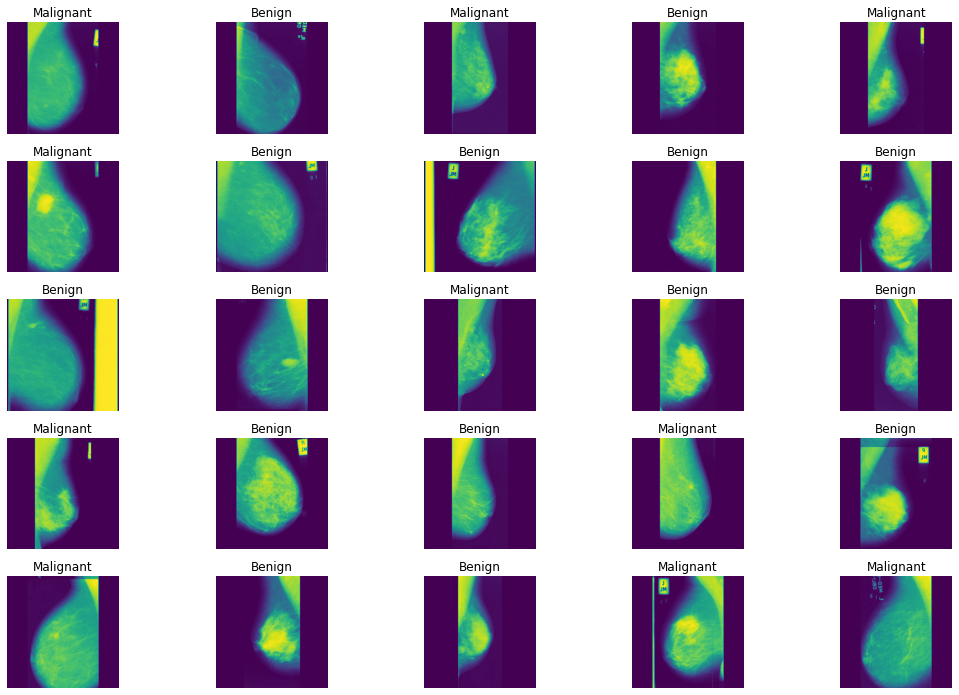

In [43]:
# View Random Images
import cv2
import matplotlib.pyplot as plt
import random

def view_25_random_image():
    fig = plt.figure(figsize = (15, 10))
    for i in range(25):
        rand = random.randint(0,len(label))
        ax = plt.subplot(5, 5, i+1)
    
        img = cv2.imread(img_name[rand], 0)
        img = cv2.resize(img, (256,256))
        if label[rand] == 1:
            plt.title('Benign')
        else:
            plt.title('Malignant')
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img)
    fig.savefig('random_25_image_fig.png')

random_images = view_25_random_image()

# Read Images and Labels and Augmentaion of Images

In [20]:
img_path = []
last_label = []
for i in range(len(img_name)):
    
    img = cv2.imread(img_name[i], 0)
    img = cv2.resize(img, (224,224))
    rows, cols= img.shape
    for angle in range(360):
            M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)    #Rotate 0 degree
            img_rotated = cv2.warpAffine(img, M, (224, 224))
            img_path.append(img_rotated)
            if label[i] == 1:
                last_label.append(1)
            else:
                last_label.append(0)

In [21]:
last_label = np.array(last_label)
img_path = np.array(img_path)

# Split Train and Test set

In [31]:
x_train, x_test, y_train, y_test = train_test_split(img_path, last_label, test_size = 0.2, random_state = 42)

In [32]:
len(x_train),len(x_test),len(y_train),len(y_test)

(35136, 8784, 35136, 8784)

In [33]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [34]:
x_train.shape

(35136, 224, 224)

In [35]:
x_test.shape

(8784, 224, 224)

In [36]:
(a,b,c)=x_train.shape # (35136, 224, 224)
x_train = np.reshape(x_train, (a, b, c, 1)) # 1 for gray scale
(a, b, c)=x_test.shape
x_test = np.reshape(x_test, (a, b, c, 1))

# Build a model

In [37]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224, 224, 1)))
    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
  
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

In [38]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)        0         
_________________________________________________________________
dense_2 (Dense)              (None, 54, 54, 64)       

#Define Callbacks

In [39]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=0,restore_best_weights=True, verbose=1)

check_point_filepath = './'

model_check_point = ModelCheckpoint(filepath =check_point_filepath, monitor='val_loss', verbose=1, save_best_only=True,
                                    save_weights_only=False, mode='auto', save_freq='epoch')

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(x_train,
                 y_train,
                 validation_split=0.2,
                 epochs=100,
                 batch_size=64,
                 callbacks=[early_stop, model_check_point])


Epoch 1/100
440/440 [==============================] - 184s 417ms/step - loss: 2.2710 - accuracy: 0.5353 - val_loss: 0.6790 - val_accuracy: 0.5531

Epoch 00001: val_loss improved from inf to 0.67898, saving model to ./
INFO:tensorflow:Assets written to: ./assets
Epoch 2/100
440/440 [==============================] - 183s 416ms/step - loss: 0.6452 - accuracy: 0.6124 - val_loss: 0.5876 - val_accuracy: 0.6727

Epoch 00002: val_loss improved from 0.67898 to 0.58762, saving model to ./
INFO:tensorflow:Assets written to: ./assets
Epoch 3/100
440/440 [==============================] - 183s 416ms/step - loss: 0.5408 - accuracy: 0.7218 - val_loss: 0.4826 - val_accuracy: 0.7705

Epoch 00003: val_loss improved from 0.58762 to 0.48255, saving model to ./
INFO:tensorflow:Assets written to: ./assets
Epoch 4/100
440/440 [==============================] - 183s 415ms/step - loss: 0.4155 - accuracy: 0.8143 - val_loss: 0.3747 - val_accuracy: 0.8372

Epoch 00004: val_loss improved from 0.48255 to 0.37470,

In [48]:
loss_value , accuracy = model.evaluate(x_test, y_test)

print('Test_loss_value = ' +str(loss_value))
print('Test_accuracy of model = ' + str("{:.4f}".format(accuracy*100))+' %')

275/275 [==============================] - 20s 71ms/step - loss: 0.1107 - accuracy: 0.9677
Test_loss_value = 0.11074836552143097
Test_accuracy of model = 96.7668 %


# Visualize our result

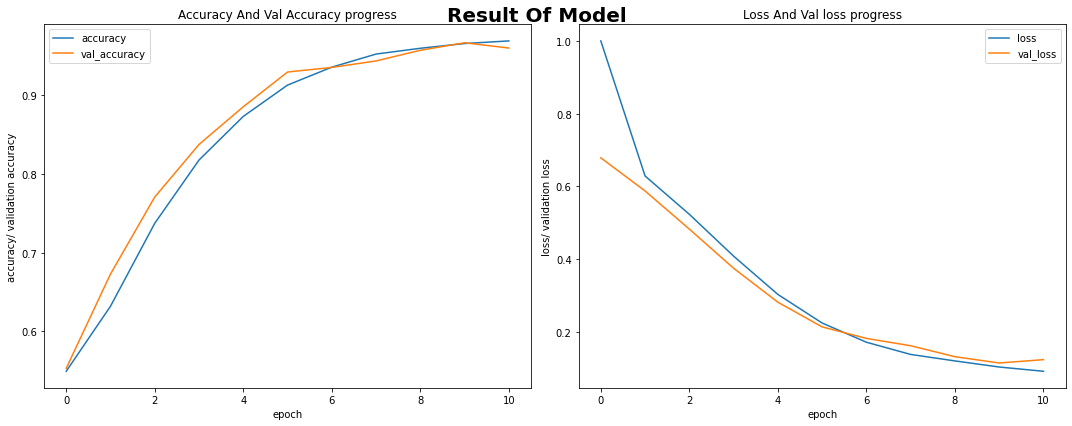

In [49]:
def Visualize_Result(acc,val_acc,loss, val_loss):
    fig, (ax1, ax2) = plt.subplots(nrows = 1,
                                   ncols = 2,
                                   figsize = (15,6),
                                   sharex =True)

    plot1 = ax1.plot(range(0, len(acc)),
                     acc,
                     label = 'accuracy')

    plot2 = ax1.plot(range(0, len(val_acc)),
                     val_acc,
                     label = 'val_accuracy')

    ax1.set(title = 'Accuracy And Val Accuracy progress',
            xlabel = 'epoch',
            ylabel = 'accuracy/ validation accuracy')

    ax1.legend()

    plot3 = ax2.plot(range(0, len(loss)),
                     loss,
                     label = 'loss')
    
    plot4 = ax2.plot(range(0, len(val_loss)),
                     val_loss,
                     label = 'val_loss')
    
    ax2.set(title = 'Loss And Val loss progress',
            xlabel = 'epoch',
            ylabel = 'loss/ validation loss')

    ax2.legend()

    fig.suptitle('Result Of Model', fontsize = 20, fontweight = 'bold')
    fig.savefig('Accuracy_Loss_figure.png')
    plt.tight_layout()
    plt.show()

visualize_result = Visualize_Result(hist.history['accuracy'],hist.history['val_accuracy'], hist.history['loss'], hist.history['val_loss'])

In [65]:
y_pred=model.predict(x_test)
y_pred

array([[5.75969964e-02],
       [1.53896123e-01],
       [6.33203545e-10],
       ...,
       [1.25534525e-02],
       [9.99887109e-01],
       [6.40202984e-02]], dtype=float32)

#**Testing the Images**


101
The prediction of image with name mdb239 is: Malignant


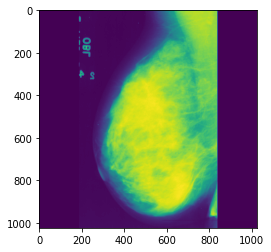

In [180]:
import random
import matplotlib.pyplot as plt
import cv2

i = random.randint(0,121)
print(i) 

img = cv2.imread(img_name[i], 0)
plt.imshow(img);


if y_pred[i] <= 0.5:
    result = "Malignant"
else:
    result = "Benign"

print(f"The prediction of image with name {ids[i]} is:",result)

In [181]:
# Checking the actual result
### We know: Benign = 1, Malignant = 0

print(i)
print(info.head(i+1))

if label[i] == 1:
  result ='Benign'
else:
  result ='Malignant'

print('The acutal image is :',result)

101
     level_0  index  REFNUM BG CLASS SEVERITY      X      Y  RADIUS
0          0      0  mdb001  G  CIRC        B  535.0  425.0   197.0
1          1      1  mdb002  G  CIRC        B  522.0  280.0    69.0
2          2      4  mdb005  F  CIRC        B  477.0  133.0    30.0
3          4     10  mdb010  F  CIRC        B  525.0  425.0    33.0
4          5     12  mdb012  F  CIRC        B  471.0  458.0    40.0
..       ...    ...     ... ..   ...      ...    ...    ...     ...
97        98    238  mdb233  G  CALC        M    NaN    NaN     NaN
98        99    241  mdb236  D  CALC        B  276.0  824.0    14.0
99       100    243  mdb238  F  CALC        M  522.0  553.0    17.0
100      101    244  mdb239  D  CALC        M  645.0  755.0    40.0
101      102    245  mdb239  D  CALC        M  567.0  808.0    25.0

[102 rows x 9 columns]
The acutal image is : Malignant


58
The prediction of image with name mdb160 is: Benign


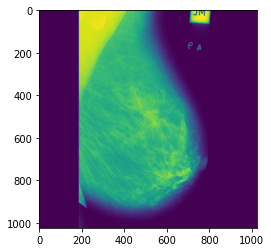

In [182]:
import random
import matplotlib.pyplot as plt
import cv2

i = random.randint(0,121)
print(i)

img = cv2.imread(img_name[i], 0)
plt.imshow(img);


if y_pred[i] <= 0.5:
    result = "Malignant"
else:
    result = "Benign"

print(f"The prediction of image with name {ids[i]} is:",result)

In [183]:
# Checking the actual result
### We know: Benign = 1, Malignant = 0

print(i)
print(info.head(i+1))

if label[i] == 1:
  result ='Benign'
else:
  result ='Malignant'

print('The acutal image is :',result)

58
    level_0  index  REFNUM BG CLASS SEVERITY      X      Y  RADIUS
0         0      0  mdb001  G  CIRC        B  535.0  425.0   197.0
1         1      1  mdb002  G  CIRC        B  522.0  280.0    69.0
2         2      4  mdb005  F  CIRC        B  477.0  133.0    30.0
3         4     10  mdb010  F  CIRC        B  525.0  425.0    33.0
4         5     12  mdb012  F  CIRC        B  471.0  458.0    40.0
5         6     13  mdb013  G  MISC        B  667.0  365.0    31.0
6         7     15  mdb015  G  CIRC        B  595.0  864.0    68.0
7         8     17  mdb017  G  CIRC        B  547.0  573.0    48.0
8         9     19  mdb019  G  CIRC        B  653.0  477.0    49.0
9        10     21  mdb021  G  CIRC        B  493.0  125.0    49.0
10       11     23  mdb023  G  CIRC        M  538.0  681.0    29.0
11       12     25  mdb025  F  CIRC        B  674.0  443.0    79.0
12       13     28  mdb028  F  CIRC        M  338.0  314.0    56.0
13       14     30  mdb030  G  MISC        B  322.0  676.0 